In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('data.csv',encoding='unicode_escape')
# Reading the dataset

In [3]:
df.head()
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [4]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [5]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [6]:
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
location                            3
sampling_date                       3
state                               0
dtype: int64

In [7]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [8]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [9]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [10]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [11]:
df.isnull().sum()
# Now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [12]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [13]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [14]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [15]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


In [16]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    elif (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    elif (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [17]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [18]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
        rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [19]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
        spi=spm*50/50
    elif(spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [20]:
global m
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
        aqi=si
        m=1
    if(ni>si and ni>rspmi and ni>spmi):
        aqi=ni
        m=2
    if(rspmi>si and rspmi>ni and rspmi>spmi):
        aqi=rspmi
        m=3
    if(spmi>si and spmi>ni and spmi>rspmi):
        aqi=spmi
        m=4
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [21]:

# # Create a new DataFrame with the observed values only
# temp = df[['SOi', 'Noi', 'Rpi', 'SPMi', 'AQI']]

# # Write the observed values to a new CSV file
# temp.to_csv('observed.csv', index=False)

# # Print a message to confirm the file was written
# print(temp)


In [22]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()


# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [23]:

# Create a new DataFrame with the observed values only
temp = df[['SOi', 'Noi', 'Rpi', 'SPMi', 'AQI','AQI_Range']]

# Write the observed values to a new CSV file
temp.to_csv('observed.csv', index=False)

# Print a message to confirm the file was written
print(temp)


           SOi     Noi  Rpi  SPMi     AQI AQI_Range
0        6.000  21.750  0.0   0.0  21.750      Good
1        3.875   8.750  0.0   0.0   8.750      Good
2        7.750  35.625  0.0   0.0  35.625      Good
3        7.875  18.375  0.0   0.0  18.375      Good
4        5.875   9.375  0.0   0.0   9.375      Good
...        ...     ...  ...   ...     ...       ...
435737  27.500  62.500  0.0   0.0  62.500  Moderate
435738  25.000  57.500  0.0   0.0  57.500  Moderate
435739   0.000   0.000  0.0   0.0   0.000      Good
435740   0.000   0.000  0.0   0.0   0.000      Good
435741   0.000   0.000  0.0   0.0   0.000      Good

[435742 rows x 6 columns]


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [25]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(305019, 4) (130723, 4) (305019,) (130723,)


In [27]:
# KNN Model
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, Y_train)
knn_train_pred = model_knn.predict(X_train)
knn_test_pred = model_knn.predict(X_test)
print("KNeighborsRegressor Model")
knn_mse_train = mean_squared_error(Y_train, knn_train_pred)
knn_mse_test = mean_squared_error(Y_test, knn_test_pred)
print("MSE TrainingData = ",mean_squared_error(Y_train, knn_train_pred))
print("MSE TestingData = ",mean_squared_error(Y_test, knn_test_pred))
print('-' * 50)


knn_rmse_train = np.sqrt(knn_mse_train)
knn_rmse_test = np.sqrt(knn_mse_test)
print("RMSE TrainingData = ",np.sqrt(knn_mse_train))
print("RMSE TestingData = ",np.sqrt(knn_mse_test))

KNeighborsRegressor Model
MSE TrainingData =  1.1590437123945998
MSE TestingData =  1.5977925876547805
--------------------------------------------------
RMSE TrainingData =  1.076588924517896
RMSE TestingData =  1.2640382065644933


In [28]:
# def predict_AQI(model, X_new):
#     prediction = model.predict(X_new) # make a prediction using the model
#     return prediction[0] # return the AQI value

# def predict_AQI_Range(AQI_value):
#     return AQI_Range(AQI_value) 
# AQI_value_prediction = predict_AQI(model_knn, X_new) # make a prediction for the AQI value
# AQI_Range_prediction = predict_AQI_Range(AQI_value_prediction) 

# print(AQI_value_prediction)

In [29]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']

In [30]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

In [31]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7886910980417678
Model accuracy on test is:  0.7894502590493411
--------------------------------------------------
KappaScore is:  0.6733117252812444


In [32]:
#fit the model on train data 
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998122326923745
--------------------------------------------------
KappaScore is:  0.9997215109561272


In [33]:
DT2.predict([[2,45.8,37,32]])

array(['Good'], dtype=object)

In [34]:
log_reg.predict([[2.7,45,35.16,23]]) 

array(['Moderate'], dtype=object)

In [35]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))


Model accuracy on train is:  0.9999931494415082
Model accuracy on test is:  0.9998122326923745
--------------------------------------------------
KappaScore is:  0.9997215138386552


In [36]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.998153774486465
Model accuracy on test is:  0.9967105949441913
--------------------------------------------------
KappaScore is:  0.9951205476925056


In [37]:
KNN.predict([[7.4,47.7,78.182,100]]) 

array(['Poor'], dtype=object)

In [38]:
Y_test

17593      17.500000
134413     41.250000
360229     31.250000
358484     17.500000
265920      6.250000
             ...    
373593    433.720930
413309    403.953488
81273     430.232558
223929     77.000000
363662     43.750000
Name: AQI, Length: 130723, dtype: float64

In [39]:
# so2 = float(input("Enter the value for SO2: "))
# no2 = float(input("Enter the value for NO2: "))
# rspm = float(input("Enter the value for RSPM: "))
# spm = float(input("Enter the value for SPM: "))
# SOi=cal_SOi(so2)
# Noi=cal_Noi(no2)
# Rpmi=cal_RSPMI(rspm)
# SPMi=cal_SPMi(spm)
# X_new = np.array([[SOi, Noi, Rpmi, SPMi]]) 
def predict_AQI(model, X_new):
    prediction = model.predict(X_new) # make a prediction using the model
    return prediction[0] # return the AQI value

def predict_AQI_Range(AQI_value):
    return AQI_Range(AQI_value) 
# AQI_value_prediction = predict_AQI(model_knn, X_new) # make a prediction for the AQI value
# AQI_Range_prediction = predict_AQI_Range(AQI_value_prediction) 

# print(AQI_value_prediction)
# print(AQI_Range_prediction)


# if SOi>Noi and SOi>Rpmi and SOi>SPMi:
#     print("Air quality is decreased due to increase in the SO2 concentration.")
#     print("- Health issues caused by air containing SO2 are Respiratory problems, Eye and throat irritation, Increased risk of infections, Cardiovascular problems, Premature death.")
#     print("- Factors whichimpacting the level of SO2 concentration are Industrial emissions, Transportation emissions, Feul quality, Weather Patterns, Natural Sources.") 
#     print("- Reducing the factors that contribute to the increase in SO2 concentration in the air requires a multi-faceted approach, involving cooperation between industry, government, and individuals to implement effective measures that can help protect air quality and public health.")
# elif Noi>SOi and Noi>Rpmi and Noi>SPMi:
#     print("Air quality is decreased due to increase in the NO2 concentration.")
#     print("- Health issues caused by air containing NO2 are Respiratory problems, Increased risk of respiratory infections, Cardiovascular problems, Reduced lung function, Premature death, Adverse pregnancy outcomes.")
#     print("- Factors which impacting the level of NO2 concentration are Transportation emissions, Industrial emissions, Agricultural activities, Combustion of biomass, Weather patterns, Natural sources.")
#     print("- Reduce transportation emissions, Reduce industrial emissions, Reduce agricultural emissions, Promote the use of cleaner energy sources, Monitor air quality, Implement policies and regulations.")
    
# elif Rpmi>SOi and Rpmi>Noi and Rpmi>SPMi:
#     print("Air quality is decreased due to increase in the RSPM concentration.")
#     print("- Health issues caused by air containing RSPM are Respiratory problems, Increased risk of respiratory infections, Cardiovascular problems, Reduced lung function, Premature death, Adverse pregnancy outcomes.")
#     print("- Factors which impacting the level of RSPM concentration are Industrial and vehicular emissions, Construction activities Agricultural practices, Natural sources, Weather patterns.")
#     print("- Reducing the factors contribute to the increase in RSPM concentration in the air requires Use of cleaner fuels, Promoting sustainable transportation, Implementing emission standards, Encouraging sustainable agricultural practices, Implementing dust control measures, Promoting public awareness.")
# else:
#     print("Air quality is decreased due to increase in the SPM concentration.")
#     print("- Health issues caused by air containing SPM are Respiratory problems, Increased risk of respiratory infections, Cardiovascular problems, Reduced lung function, Premature death, Adverse pregnancy outcomes.")
#     print("- Factors which impacting the level of SPM concentration are Industrial and vehicular emissions, Construction activities Agricultural practices, Natural sources, Weather patterns.")
#     print("- Reducing the factors contribute to the increase in RSPM concentration in the air requires Use of cleaner fuels, Promoting sustainable transportation, Implementing emission standards, Encouraging sustainable agricultural practices, Implementing dust control measures, Promoting public awareness.")
    
# workbook = openpyxl.("values.xlsx")
# sheet = workbook.active
# sload_workbookheet.append([SOi,Noi,Rpmi,SPMi,AQI_value_prediction,AQI_Range_prediction])
# workbook.save("values.xlsx")

In [41]:
from flask import Flask, render_template, request
import joblib

app = Flask(__name__,template_folder='C:/Users/saiku/Documents/main_project/templates')

# Load the pre-trained machine learning model
# model = joblib.load('model.pkl')

# Define the route for the index page
@app.route('/', methods=['GET', 'POST'])
def index():
    # If the request is a POST request, retrieve the form data
    if request.method == 'POST':
        so2 = float(request.form['so2'])
        no2 = float(request.form['no2'])
        rspm = float(request.form['rspm'])
        spm = float(request.form['spm'])
        x_new = np.array([[so2, no2, rspm, spm]])
        # Use the pre-trained model to make a prediction based on the form data
        # prediction = KNN.predict([[so2, no2, rspm, spm]])
        aqi_value = predict_AQI(model_knn,x_new)
        aqi_range = predict_AQI_Range(aqi_value)
        # Return the prediction to the user
        return render_template('index.html', aqi_range=aqi_range,aqi_value = aqi_value)
    
    # If the request is a GET request, render the index.html template
    return render_template('index.html')

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Mar/2023 08:40:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2023 08:40:43] "GET /back.jpeg HTTP/1.1" 404 -
127.0.0.1 - - [16/Mar/2023 08:40:43] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/Mar/2023 08:41:03] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2023 08:41:03] "GET /back.jpeg HTTP/1.1" 404 -


In [ ]:
# import matplotlib.pyplot as plt

# var=pd.read_excel('AQI_values.xlsx')
# var

,AQI_Predicted,AQI_Observed,AQI_Predicted1,AQI_Observed.1
0,23.300,21.750000,21.750,21.750
1,7.450,8.750000,8.750,8.750
2,34.233,35.625000,35.625,35.625
3,17.980,18.375000,18.375,18.375
4,10.780,9.375000,9.375,9.375
...,...,...,...,...
135,84.000,83.000000,NaN,NaN
136,114.000,138.666667,NaN,NaN
137,99.800,142.000000,NaN,NaN
138,60.340,50.232000,NaN,NaN


In [ ]:
# y = list(var['AQI_Predicted'])
# x = list(var['AQI_Observed'])

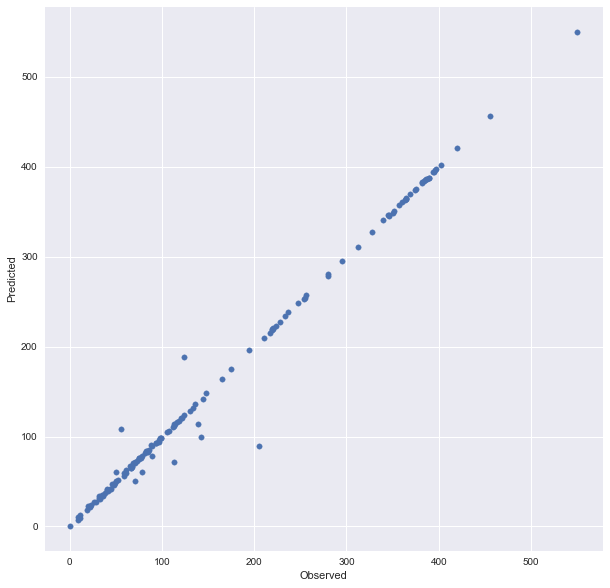

In [ ]:
# plt.figure(figsize=(10,10))
# plt.style.use('seaborn')
# plt.scatter(x,y,marker="o",s=30
#             )
# plt.xlabel('Observed')
# plt.ylabel('Predicted')
# plt.savefig('image_graph.png')
# plt.show()